In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
overdose_death_rates = "Resources/overdose_death_rates.csv"
prescription_rates = "Resources/opioid_total_us_years.csv"

# read as df
overdose_df = pd.read_csv(overdose_death_rates,sep = ";")
prescription_df = pd.read_csv(prescription_rates)

# Read and clean overdose data

In [11]:
overdose_df.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
1,Arizona,2015,19.0,NaN,10.2,NaN,0.04,NaN,0.16,NaN
2,Vermont,2003,10.2,NaN,7.2,NaN,0.36,NaN,0.24,NaN
3,Kansas,2008,8.0,NaN,3.5,NaN,-0.20,NaN,-0.20,NaN
4,Idaho,2009,11.6,NaN,4.2,NaN,0.18,NaN,-0.13,NaN


In [17]:
#group data by states
year_overdose = overdose_df.groupby(["Year"]).mean()
year_overdose=year_overdose.reset_index()
year_overdose

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,1999,5.963265,3.169767,NaN,NaN
1,2000,6.434000,3.506818,0.117143,0.174186
2,2001,7.408000,3.919149,0.195600,0.290930
3,2002,8.522000,4.629787,0.175400,0.244468
4,2003,9.466667,5.341304,0.124400,0.170435
5,2004,9.980000,5.416667,0.078800,0.094130
6,2005,10.586000,5.800000,0.075200,0.105417
7,2006,12.146000,6.683673,0.177600,0.186250
8,2007,12.331373,6.940816,0.034200,0.061042
9,2008,12.678431,7.350980,0.052745,0.075714


# Read and clean prescription data

In [16]:
prescription_df

,Year,Prescriptions Dispensed (millions)
0,1991,76
1,1992,79
2,1993,82
3,1994,85
4,1995,87
5,1996,94
6,1997,97
7,1998,105
8,1999,116
9,2000,126


In [27]:
all_data_df=year_overdose.set_index('Year').join(prescription_df.set_index('Year'))
all_data_df=all_data_df.reset_index()
#all_data_df=all_data_df.dropna()
all_data_df

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,Prescriptions Dispensed (millions)
0,1999,5.963265,3.169767,NaN,NaN,116.0
1,2000,6.434000,3.506818,0.117143,0.174186,126.0
2,2001,7.408000,3.919149,0.195600,0.290930,138.0
3,2002,8.522000,4.629787,0.175400,0.244468,142.0
4,2003,9.466667,5.341304,0.124400,0.170435,149.0
5,2004,9.980000,5.416667,0.078800,0.094130,155.0
6,2005,10.586000,5.800000,0.075200,0.105417,163.0
7,2006,12.146000,6.683673,0.177600,0.186250,174.0
8,2007,12.331373,6.940816,0.034200,0.061042,184.0
9,2008,12.678431,7.350980,0.052745,0.075714,196.0


In [66]:
graph_data = all_data_df[['Year',
                          'All Drug Overdose Death Rate (Age-Adjusted)',
                          'Opioid Overdose Death Rate (Age-Adjusted)', 'Prescriptions Dispensed (millions)']]
graph_data=graph_data.dropna()
graph_data

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Prescriptions Dispensed (millions)
0,1999,5.963265,3.169767,116.0
1,2000,6.434000,3.506818,126.0
2,2001,7.408000,3.919149,138.0
3,2002,8.522000,4.629787,142.0
4,2003,9.466667,5.341304,149.0
5,2004,9.980000,5.416667,155.0
6,2005,10.586000,5.800000,163.0
7,2006,12.146000,6.683673,174.0
8,2007,12.331373,6.940816,184.0
9,2008,12.678431,7.350980,196.0


# Create a scatter plot to show prescription data and overdose death rates over time

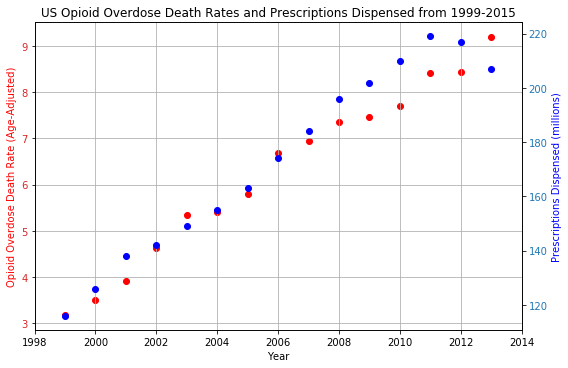

In [74]:
#create twin scatterplots to show timeseries 
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_xlim([1998, 2014])
ax1.set_ylabel('Opioid Overdose Death Rate (Age-Adjusted)', color='red')
ax1.scatter(graph_data['Year'], graph_data['Opioid Overdose Death Rate (Age-Adjusted)'], color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Prescriptions Dispensed (millions)', color='blue')  
ax2.scatter(graph_data['Year'], graph_data['Prescriptions Dispensed (millions)'], color='blue')
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y')
ax1.grid(axis='x')

fig.tight_layout()  
plt.title("US Opioid Overdose Death Rates and Prescriptions Dispensed from 1999-2015")
plt.show()

# Create second scatter plot and linnear regression to asses correlation between prescriptions dispensed and opioid overdose death rate

In [83]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(graph_data['Prescriptions Dispensed (millions)'], 
                                         graph_data['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * graph_data['Prescriptions Dispensed (millions)'] + intercept


In [82]:
rvalue

0.9759663772844712

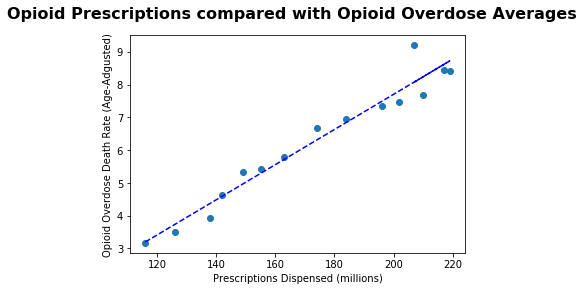

In [85]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Opioid Prescriptions compared with Opioid Overdose Averages", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Prescriptions Dispensed (millions)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(graph_data['Prescriptions Dispensed (millions)'], 
        graph_data['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(graph_data['Prescriptions Dispensed (millions)'], fit, 'b--')

plt.show()

 - The rvalue for prescriptions dispensed and opioid overdose death rate is very high, showing a correlation